# BoxPlot Yöntemi

In [5]:
import seaborn as sbn 
df=sbn.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df=df.select_dtypes(include=['float64', 'int64'])
df


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [36]:
#Aykırı gözlem tespiti yapmak istediğimiz için eksik verileri kontrol edip varsa sileceğiz. 
df.isnull().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [38]:
df=df.dropna()

In [39]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [40]:
df_table=df["table"]

In [41]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<AxesSubplot:xlabel='table'>

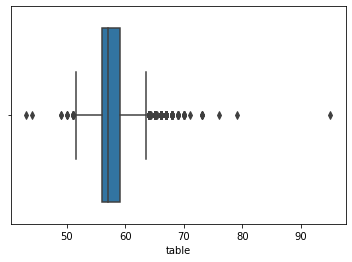

In [42]:
#Boxplot Aykırı gözlem tespiti yöntemidir. 

sbn.boxplot(x=df_table)

Aykırı değerler için bir eşik değerine ihtiyacımız var. 
Boxplot kullanarak bu eşik değerleri belirleyebiliriz.


In [43]:
# quantile verileri küçükten büyüğe sıralayıp 0.25. index'e karşılık gelen değeri alacak
Q1=df_table.quantile(0.25)

Q3=df_table.quantile(0.75)

#Boxplot hesaplanması 
IQR= Q3 - Q1 

In [44]:

print(Q1)
print(Q3)
print(IQR)

56.0
59.0
3.0


In [45]:
#Eşik değerlerin hesaplanması 

lower_limit=Q1 - 1.5* IQR
upper_limit=Q3 + 1.5* IQR

In [46]:
lower_limit

51.5

In [47]:
upper_limit

63.5

In [48]:
((df_table < lower_limit)) |( (df_table > upper_limit))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [49]:
outliers=(df_table < lower_limit)

In [50]:
outliers.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [51]:
df_table[outliers]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

# Aykırı değeri silme işlemi

In [52]:
import pandas as pd

In [53]:
type(df_table)

pandas.core.series.Series

In [54]:
df_table=pd.DataFrame(df_table)

In [57]:
cleaned_df=df_table[~(((df_table< lower_limit)| (df_table> upper_limit))).any(axis=1)]

In [58]:
cleaned_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


# Ortalama ile doldurma 
Bu da bir diğer aykırı gözlem tespiti yöntemidir

In [59]:
import seaborn as sbn 
df=sbn.load_dataset('diamonds')
df

df=df.select_dtypes(include=['float64', 'int64'])
df


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [60]:


#Aykırı gözlem tespiti yapmak istediğimiz için eksik verileri kontrol edip varsa sileceğiz. 
df.isnull().sum()

df=df.dropna()

df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


Eksik verileri analiz edip sildik. Boxplot yönteminde aykırı verileri de silmiştik burada ise bu aykırı değerleri ortalama ile dolduruyoruz. 

In [61]:
outliers

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [62]:
df_table[outliers]

,table
1515,51.0
3238,50.1
3979,51.0
4150,51.0
5979,49.0
7418,50.0
8853,51.0
11368,43.0
22701,49.0
25179,50.0


In [63]:
df_table.mean()

table    57.457184
dtype: float64

In [64]:
df_table[outliers]=df_table.mean()

In [65]:
#Aynı işlem üst sınırı aşan değerler için de yapılmalıdır. 
df_table[outliers]

,table
1515,57.457184
3238,57.457184
3979,57.457184
4150,57.457184
5979,57.457184
7418,57.457184
8853,57.457184
11368,57.457184
22701,57.457184
25179,57.457184


# Baskılama Yöntemi
Bu yöntemde yakalanan aykırı değerler üst sınıra yakınsa üst sınıra; alt sınıra yakınsa alt sınıra eşitlenir. 

In [68]:
import seaborn as sbn 
df=sbn.load_dataset('diamonds')
df

df=df.select_dtypes(include=['float64', 'int64'])
 
df.isnull().sum()

df=df.dropna()

df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [70]:
df_table= df["table"]

In [71]:
df_table[outliers]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [72]:
df_table[outliers]= lower_limit

C:\Users\sevva\AppData\Local\Temp\ipykernel_11164\1301185277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[outliers]= lower_limit


In [73]:
df_table[outliers]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

Alt sınıra yakın değerler alt sınıra eşitlenmiş oldu. 